Parte 1: Exploración y Visualización de Datos (EDA)

Carga y Exploración Inicial de Datos:
Cargar el dataset y revisar su estructura básica.
Describir las variables y su distribución.
Identificar y tratar valores nulos y outliers.

In [1]:
import pandas as pd
import numpy as np


url = 'https://drive.google.com/uc?id=1lG4WZdJhHhvCR-a78ZvXBYB66gOKl47K&export=download'
df = pd.read_csv(url)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


Organizo el DataFrame con Transaction ID como la primer categoria de los datos.

In [3]:
# Código para realizarlo
df = df.set_index('Transaction ID')

# Confirmo el cambio hecho
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [17]:
#1. Se crea la columna Store para realizar el calculo total de ventas por produto y tienda.

df['Store'] = np.random.choice(['Colombia', 'Chile', 'Perú'], size = len(df))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
 8   Store             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [19]:
# Estadísticos del DataFrame
df.describe().round(3)

,Age,Quantity,Price per Unit,Total Amount
count,1000.000,1000.000,1000.000,1000.000
mean,41.392,2.514,179.890,456.000
std,13.681,1.133,189.681,559.998
min,18.000,1.000,25.000,25.000
25%,29.000,1.000,30.000,60.000
50%,42.000,3.000,50.000,135.000
75%,53.000,4.000,300.000,900.000
max,64.000,4.000,500.000,2000.000


In [20]:
# Revisión de nulos
df.isnull().sum()

,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0
Store,0


In [21]:
# Revisión de duplicados
df.duplicated().sum()

0

Verificación de tipo de datos categóricos

In [22]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna Date:
['2023-11-24' '2023-02-27' '2023-01-13' '2023-05-21' '2023-05-06'
 '2023-04-25' '2023-03-13' '2023-02-22' '2023-12-13' '2023-10-07'
 '2023-02-14' '2023-10-30' '2023-08-05' '2023-01-17' '2023-01-16'
 '2023-02-17' '2023-04-22' '2023-04-30' '2023-09-16' '2023-11-05'
 '2023-01-14' '2023-10-15' '2023-04-12' '2023-11-29' '2023-12-26'
 '2023-08-03' '2023-04-23' '2023-08-18' '2023-10-29' '2023-05-23'
 '2023-01-04' '2023-03-23' '2023-12-24' '2023-06-24' '2023-03-21'
 '2023-04-21' '2023-06-22' '2023-07-14' '2023-02-19' '2023-07-03'
 '2023-06-26' '2023-11-06' '2023-05-16' '2023-01-23' '2023-08-24'
 '2023-10-02' '2023-03-05' '2023-07-13' '2023-02-10' '2023-10-10'
 '2023-05-31' '2023-11-18' '2023-11-13' '2023-07-05' '2023-10-23'
 '2023-04-09' '2023-12-27' '2023-02-05' '2023-01-24' '2023-12-05'
 '2023-04-27' '2023-05-29' '2023-02-21' '2023-08-21' '2023-11-22'
 '2023-07-06' '2023-03-25' '2023-07-09' '2023-07-01' '2023-04-18'
 '2023-12-10' '2023-05-17' '2023-12-16' '

Eliminación de la columna index ya que no representa mayor relevancia en la data

In [23]:
df.info() # Verifico la transformación

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
 8   Store             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


Reviso el comportamiento de los datos (Revisión de datos atípicos)

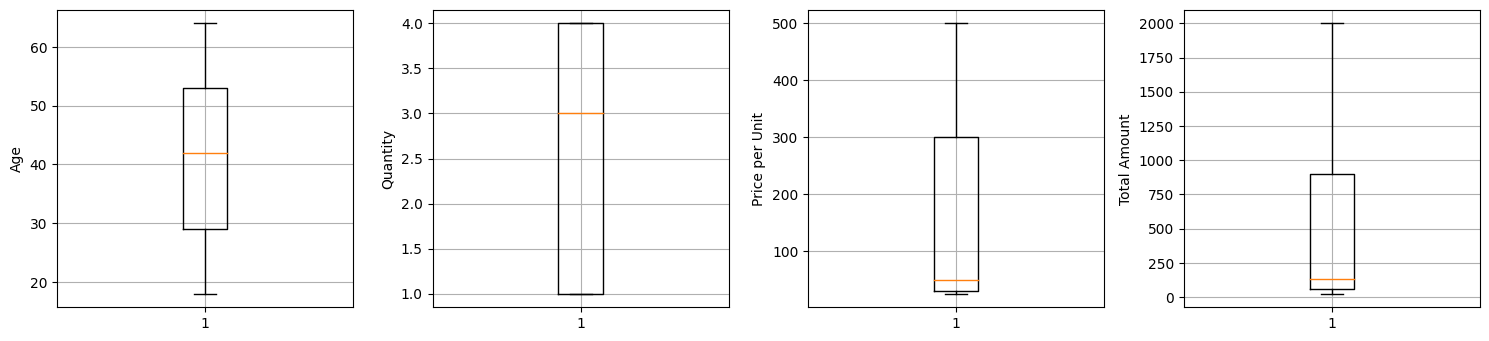

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

3. Visualización de Datos:


Crear subplots para comparar diferentes variables clave.


Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

Visualización de los datos

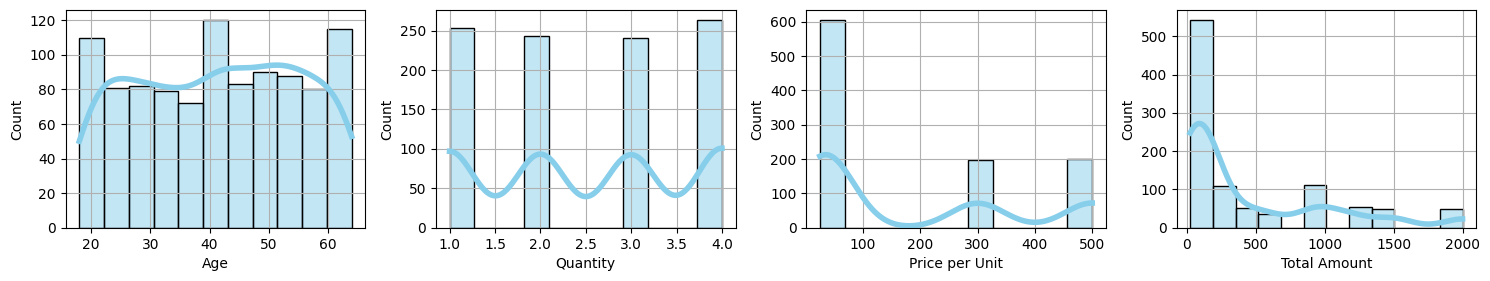

In [25]:
columnas = df.select_dtypes(include=['float64', 'int']).columns

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color='skyblue', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

En la categoría 'Age' se evidencia un comportamiento muy homogéneo lo que indica que están todas las edades realizando compras.

'Quantity' y 'Price per unit' comportamiento multimodal lo que indica una frecuencia de compra constante entre dichos valores.

'Total Amount' se evidencia comportamiento sesgado hacia la izquierda es normal ya que se trata de un crecimiento en el total de venta.


In [29]:
# Agrupar por categoría de producto y tienda, sumando las ventas totales
filtro2 = df.groupby(['Store', 'Product Category'])['Total Amount'].sum().unstack()

In [30]:
# Extraer las categorías para cada tienda
beauty = filtro2['Beauty']  # Ventas de la categoría 'Beauty' por tienda
electronics = filtro2['Electronics']  # Ventas de la categoría 'Electronics' por tienda
clothing = filtro2['Clothing']  # Ventas de la categoría 'Clothing' por tienda

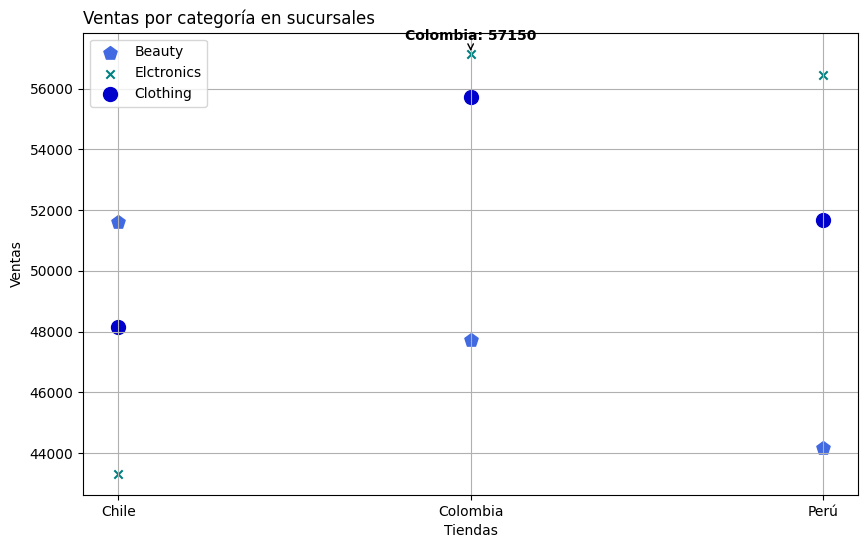

In [37]:
#Gráfico de dispersión con personalización.
# https://codingdojolatam.la/cursos/data-science-fundamentals-julio-2024/leccion/visualizacion-para-ciencia-de-datos-analisis-exploratorio-de-datos-y-matplotlib-basico-2/

plt.figure(figsize=(10, 6))
plt.scatter(beauty.index, beauty.values, color='royalblue', marker= 'p', s= 100, label= 'Beauty')
plt.scatter(electronics.index, electronics.values, color='teal', marker= 'x', label= 'Elctronics')
plt.scatter(clothing.index, clothing.values, color='mediumblue', marker= 'o', s= 100, label= 'Clothing')

 #Anotación en la tienda "Colombia" para la categoría "Electronics" con flecha
tienda_colombia = 'Colombia'  # Nombre de la tienda
if tienda_colombia in electronics.index:  # Verificar si 'Colombia' está en los datos
    valor_colombia = electronics.loc[tienda_colombia]
    plt.annotate(f'Colombia: {valor_colombia}',
                 (tienda_colombia, valor_colombia),  # Coordenadas del punto a anotar
                 textcoords="offset points",  # Cómo posicionar el texto
                 xytext=(0, 10),  # Desplazamiento del texto (10 puntos hacia arriba)
                 ha='center', color='black', fontsize=10, fontweight='bold',
                 arrowprops=dict(facecolor='black', arrowstyle="->"))  # Propiedades de la flecha

plt.title("Ventas por categoría en sucursales", loc='left')
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.legend()
plt.grid(axis='both')
plt.show()

En el gráfico anterior se puede apreciar que la categoría 'Elctronics' en la tienda 'Colombia' tiene mayor número de ventas al comparar con las tiendas 'Perú' y 'Chile'.

2. Análisis de Correlación:


Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

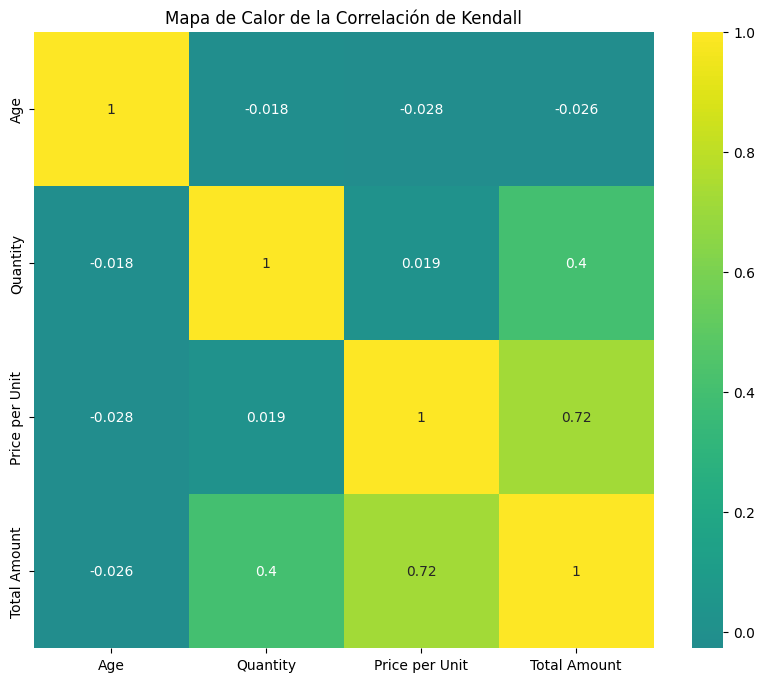

In [38]:
columnas = df.select_dtypes(include=['float64', 'int']).columns  # Columnas que contengan números enteros y flotantes

correlacion = df[columnas]  # Se guardan las categorías en una variable denominada correlacion

# Se realiza la correlación por el método 'kendall'
kendall_corr = correlacion.corr(method='kendall')

# Crear mapa de calor con el método 'kendall'
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()


Se evidencia relación directa entre la categoría 'Price per Unit' con 'Quantity'.

Poca relación entre 'Total Amount', 'Quantity' y 'Total Amount' y 'Price per Unit'.

Exportación del dataset con el proceso EDA

In [39]:
df.to_csv('VentasTiendasEDA.csv', index = False)

Descarga del archivo la computadora

In [40]:
from google.colab import files
files.download('VentasTiendasEDA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>